# **영화 리뷰 감성분석**
---


## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ 영화 리뷰 감성분석
```  

> **프로젝트유형**

```
▶ 리뷰 데이터 활용 감성분석(긍/부정)

```



## **문제상황 Introduction**
---

> **문제정의**

```
▶ 서비스 사용자들의 평가에 대한 깊은 이해를 원함
```  

> **기대효과**

```
▶ 효율적인 평가분석 가능, 평가분석을 통하여 경쟁력있는 작품 선정 가능성 증가
```

> **해결방안**

```
▶ 리뷰 데이터 자연어 처리를 통한 감성분석 진행
```


> **데이터 살펴보기**


|Column|Description|
|:---|:---|
|review|리뷰|
|sentiment|긍/부정|




In [ ]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/개인 프로젝트/14')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/개인 프로젝트/14'

In [ ]:
import pandas as pd
df = pd.read_csv('P_PJT14_DATA.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Process01
---
- DATA 전처리 및 EDA

### DATA 전처리 및 EDA

In [ ]:
df.shape

(50000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


<Axes: xlabel='sentiment'>

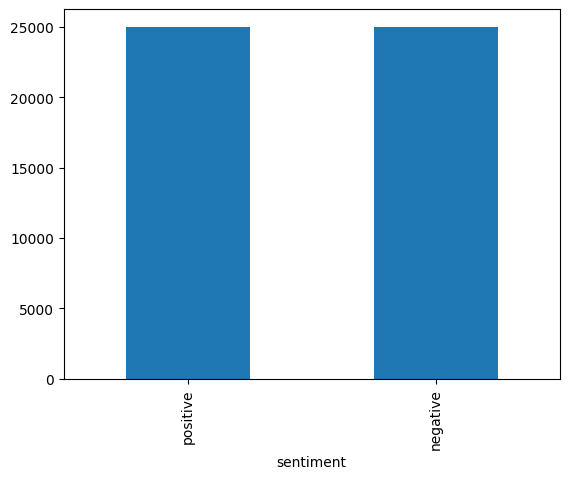

In [ ]:
df['sentiment'].value_counts().plot(kind='bar')

In [ ]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [ ]:
df['senti'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
df.head()

,review,sentiment,senti
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


## Process02
---

- 자연어 처리

### 토큰화
---

In [ ]:
# keras를 이용하여 리뷰 문장을 분해함
from tensorflow.keras.preprocessing.text import text_to_word_sequence

def token_text(text):
  return text_to_word_sequence(text)

df['tokens'] = df['review'].apply(token_text)
df.head(10)

,review,sentiment,senti,tokens
0,One of the other reviewers has mentioned that ...,positive,1,"[one, of, the, other, reviewers, has, mentione..."
1,A wonderful little production. <br /><br />The...,positive,1,"[a, wonderful, little, production, br, br, the..."
2,I thought this was a wonderful way to spend ti...,positive,1,"[i, thought, this, was, a, wonderful, way, to,..."
3,Basically there's a family where a little boy ...,negative,0,"[basically, there's, a, family, where, a, litt..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,"[petter, mattei's, love, in, the, time, of, mo..."
5,"Probably my all-time favorite movie, a story o...",positive,1,"[probably, my, all, time, favorite, movie, a, ..."
6,I sure would like to see a resurrection of a u...,positive,1,"[i, sure, would, like, to, see, a, resurrectio..."
7,"This show was an amazing, fresh & innovative i...",negative,0,"[this, show, was, an, amazing, fresh, innovati..."
8,Encouraged by the positive comments about this...,negative,0,"[encouraged, by, the, positive, comments, abou..."
9,If you like original gut wrenching laughter yo...,positive,1,"[if, you, like, original, gut, wrenching, laug..."


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')
stop_words = set(stopwords.words('english'))
print(stopwords_list[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
# NLTK 불용어 리스트를 이용하여 불용어를 모두 제거함
def remove_sw(tokens):
    return [word for word in tokens if word not in stop_words]

df['tokens'] = df['tokens'].apply(remove_sw)
df.head()

,review,sentiment,senti,tokens
0,One of the other reviewers has mentioned that ...,positive,1,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,A wonderful little production. <br /><br />The...,positive,1,"[wonderful, little, production, br, br, filmin..."
2,I thought this was a wonderful way to spend ti...,positive,1,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,0,"[basically, there's, family, little, boy, jake..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,"[petter, mattei's, love, time, money, visually..."


In [ ]:
# 같은 방법으로 br 제거
def remove_br(tokens):
    return [word for word in tokens if word != 'br']

df['tokens'] = df['tokens'].apply(remove_br)
df.head()

,review,sentiment,senti,tokens
0,One of the other reviewers has mentioned that ...,positive,1,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,A wonderful little production. <br /><br />The...,positive,1,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,1,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,0,"[basically, there's, family, little, boy, jake..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,"[petter, mattei's, love, time, money, visually..."


In [ ]:
# NLTK 이용하여 단어를 원형으로 변환
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lem = WordNetLemmatizer()

def lem_tokens(tokens):
  return [lem.lemmatize(token) for token in tokens]

df['tokens'] = df['tokens'].apply(lem_tokens)
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,review,sentiment,senti,tokens
0,One of the other reviewers has mentioned that ...,positive,1,"[one, reviewer, mentioned, watching, 1, oz, ep..."
1,A wonderful little production. <br /><br />The...,positive,1,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,1,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,0,"[basically, there's, family, little, boy, jake..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,"[petter, mattei's, love, time, money, visually..."


### 단어 집합 만들기

---

In [ ]:
from sklearn.model_selection import train_test_split

X=df.drop(['review', 'sentiment', 'senti'], axis=1)
Y=df['senti']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(35000, 1)
(35000,)
(15000, 1)
(15000,)


In [ ]:
from collections import Counter

word_list = [word for tokens_list in x_train['tokens'] for word in tokens_list]
word_counts = Counter(word_list)
word_listu = list(word_counts.keys())

print(len(word_counts))
print(len(word_listu))

97110
97110


In [ ]:
print(word_counts.most_common(10))

[('movie', 71534), ('film', 63909), ('one', 38455), ('like', 28699), ('time', 21926), ('good', 20862), ('character', 19279), ('story', 17632), ('even', 17512), ('get', 17216)]


In [ ]:
word_to_index = {'<PAD>': 0, '<UNK>': 1}

for index, word in enumerate(word_listu) :
  word_to_index[word] = index + 2

In [ ]:
len(word_to_index)

97112

In [ ]:
print({word: word_to_index[word] for word in word_list[:10]})

{'ingmar': 2, "bergman's": 3, 'meditation': 4, 'war': 5, 'concern': 6, 'couple': 7, 'living': 8, 'idyllic': 9, 'existence': 10, 'small': 11}


### 정수 인코딩/패딩

---

In [ ]:
# 정수 인코딩
def texts_to_sequences(tokenized_x_data, word_to_index):
  encoded_x_data = []
  for sent in tokenized_x_data:
    index_sequences = []
    for word in sent:
      try:
          index_sequences.append(word_to_index[word])
      except KeyError:
          index_sequences.append(word_to_index['<UNK>'])
    encoded_x_data.append(index_sequences)
  return encoded_x_data

encoded_x_train = texts_to_sequences(x_train['tokens'], word_to_index)
encoded_x_test = texts_to_sequences(x_test['tokens'], word_to_index)

print(encoded_x_train[:1])

[[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 5, 18, 19, 20, 21, 22, 5, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 5, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 5, 52, 53, 23, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 57, 75, 76, 57, 77, 78, 79, 57, 80, 81, 82, 83, 81, 84, 85, 86, 87, 88, 49, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 81, 84, 57, 100, 101, 102, 103, 104, 57, 105, 106, 107, 48, 108, 57, 109, 110, 111, 112, 113, 48, 114, 115, 5, 116, 117, 118, 119]]


In [ ]:
# 패딩 전 길이 파악
print('max :',max(len(review) for review in encoded_x_train))
print('mean :',sum(map(len, encoded_x_train))/len(encoded_x_train))

max : 1441
mean : 120.76065714285714


In [ ]:
# 패딩
import numpy as np

def pad_sequences(sentences, max_len):
  features = np.zeros((len(sentences), max_len), dtype=int)
  for index, sentence in enumerate(sentences):
    if len(sentence) != 0:
      features[index, :len(sentence)] = np.array(sentence)[:max_len]
  return features
max_len = 1441

x_train = pad_sequences(encoded_x_train, max_len=max_len)
x_test = pad_sequences(encoded_x_test, max_len=max_len)

In [ ]:
print('max :',max(len(review) for review in x_train))
print('mean :',sum(map(len, x_train))/len(x_train))

max : 1441
mean : 1441.0


## Process03

---

### 모델 학습 및 테스트

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(len(word_to_index), embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=6, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/6
438/438 [==============================] - ETA: 0s - loss: 0.6935 - acc: 0.4999
Epoch 1: val_acc improved from -inf to 0.49257, saving model to best_model.h5
438/438 [==============================] - 1735s 4s/step - loss: 0.6935 - acc: 0.4999 - val_loss: 0.6936 - val_acc: 0.4926
Epoch 2/6
438/438 [==============================] - ETA: 0s - loss: 0.6933 - acc: 0.4956
Epoch 2: val_acc did not improve from 0.49257
438/438 [==============================] - 1821s 4s/step - loss: 0.6933 - acc: 0.4956 - val_loss: 0.6934 - val_acc: 0.4926
Epoch 3/6
438/438 [==============================] - ETA: 0s - loss: 0.6932 - acc: 0.5009
Epoch 3: val_acc improved from 0.49257 to 0.50743, saving model to best_model.h5
438/438 [==============================] - 1828s 4s/step - loss: 0.6932 - acc: 0.5009 - val_loss: 0.6931 - val_acc: 0.5074
Epoch 4/6
438/438 [==============================] - ETA: 0s - loss: 0.6932 - acc: 0.4969
Epoch 4: val_acc did not improve from 0.50743
438/438 [===========

In [ ]:
loaded_model = load_model('best_model.h5')
print(loaded_model.evaluate(x_test, y_test)[1])

469/469 [==============================] - 329s 701ms/step - loss: 0.6932 - acc: 0.5000
0.5


In [ ]:
def sentiment_predict(text):

  tokens = text_to_word_sequence(text)
  text = [word for word in tokens if word not in stop_words]
  encoded = texts_to_sequences(text, word_to_index)
  pad_new = pad_sequences(encoded, max_len=max_len)
  score = float(loaded_model.predict(pad_new)[0])
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [ ]:
sentiment_predict('so funny and exciting')

1/1 [==============================] - 1s 564ms/step
50.32% 확률로 긍정 리뷰입니다.



1. 데이터 전처리
2. 토큰화, 불용어 제거, 정제하기
3. 단어집합 만들어 전체 단어의 수 파악, 단어 등장 빈도 파악
4. 각 단어별로 고유한 인덱스 할당하여 정수 인코딩 진행
5. 정수 인코딩 된 데이터의 길이를 맞춰줌 -> 패딩
6. 데이터 준비가 완료됨 모델을 이용하여 학습, 정확도 측정, 텍스트 예측해보기

이번 프로젝트는 처음 접해보는 주제로 처음부터 공부하면서 완성하였다.

따라서 처음보는 코드, 도구, 함수 등을 모두 해석하고 이해하는데 시간이 아주 오래 걸렸다.

그렇지만 마지막 모델, 파라미터 등을 제외하고는 모두 대강 이해하고 흐름을 알게되었다.

완성된 모델의 정확도가 처참하고 텍스트 예측도 너무 아쉽다.

데이터를 정제하는 과정에서 조금 더 섬세하게 진행했어야 한다.

빈도를 파악한  후 빈도가 적은 단어를 삭제했어야 했고, 패딩 진행시 최대 길이를 더 짧게 잡았어야 하는게 아닌가 아쉬움이 남는다.